<a href="https://colab.research.google.com/github/weiyunna/Deep-Learning-with-Tensorflow/blob/master/MINST_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class
I've started the code for you below -- how would you finish it?

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

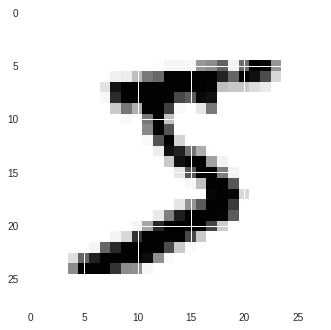

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

In [0]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [6]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2564 - acc: 0.9260
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1136 - acc: 0.9664
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0781 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0580 - acc: 0.9828
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0463 - acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0370 - acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0299 - acc: 0.9906
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0240 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0191 - acc: 0.9943
Epoch 10/1

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [12]:
model.fit(x_train, y_train, epochs=10,callbacks=[callbacks])

Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9974
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0081 - acc: 0.9974
